# Compare VAR model accuracy with respect to forecast length

In [1]:
import pandas as pd
import numpy as np

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import acf, pacf, grangercausalitytests
from statsmodels.tsa.statespace.varmax import VARMAX

## Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

import yfinance as yf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

## Read the file

In [2]:
df = pd.read_csv('../Data/dataset_others.csv')
# Extract _change_in_price columns
change_in_price_cols = [col for col in df.columns if '_change_in_price' in col]
df_change = df[change_in_price_cols].copy()

In [3]:
df = df.rename(columns={'F_Close_pred':'F_Close'})

In [4]:
tickers = []
for col in df.columns:
    if '_RSI' in col:
        tickers.append(col.split('_')[0])

tickers.pop()
tickers

['CADUSD=X', 'GM', 'JCI', 'TM', 'TRYUSD=X', '^IXIC']

In [5]:
[col for col in df.columns if 'F_' in col]

['F_Open',
 'F_Close',
 'F_High',
 'F_Low',
 'F_Volume',
 'F_Change',
 'F_Gain',
 'F_Loss',
 'F_Avg_Gain',
 'F_Avg_Loss',
 'F_SMA',
 'F_EMA',
 'F_change_in_price',
 'F_RSI',
 'F_k_percent',
 'F_r_percent',
 'F_MACD',
 'F_MACD_EMA',
 'F_ROC',
 'F_PVT',
 'F_Bollinger_Upper',
 'F_Bollinger_Lower']

In [6]:
#df[['Date','F_Close_pred']]

In [7]:
#data = yf.download('F', start='2019-11-26', end='2024-10-28')
#data

In [8]:
change_in_price_cols

['CADUSD=X_change_in_price',
 'GM_change_in_price',
 'JCI_change_in_price',
 'TM_change_in_price',
 'TRYUSD=X_change_in_price',
 '^IXIC_change_in_price',
 'F_change_in_price']

In [9]:
change_in_price_cols.pop()

'F_change_in_price'

In [10]:
change_in_price_cols

['CADUSD=X_change_in_price',
 'GM_change_in_price',
 'JCI_change_in_price',
 'TM_change_in_price',
 'TRYUSD=X_change_in_price',
 '^IXIC_change_in_price']

In [11]:
train = df.iloc[:-5].copy()
test = df.iloc[-5:].copy()

In [12]:
train.tail()

,Date,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,...,F_change_in_price,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower
1227,2024-10-15 00:00:00+00:00,0.724485,0.724485,0.724953,0.722674,0.0,-0.001141,0.000000,0.001141,0.000580,...,-0.080000,58.398467,74.285699,-25.714301,-0.025965,-0.065261,1.498126,6.648763e+07,11.081637,10.360363
1228,2024-10-16 00:00:00+00:00,0.725631,0.725631,0.726322,0.725026,0.0,0.001146,0.001146,0.000000,0.000235,...,0.190000,66.421900,82.352882,-17.647118,0.001547,-0.051900,2.319110,6.731136e+07,11.105966,10.349034
1229,2024-10-17 00:00:00+00:00,0.727008,0.727008,0.727405,0.725084,0.0,0.001377,0.001377,0.000000,0.000333,...,0.040000,67.924619,87.058758,-12.941242,0.026275,-0.036265,4.829538,6.744778e+07,11.124970,10.339030
1230,2024-10-18 00:00:00+00:00,0.724864,0.724864,0.725426,0.724171,0.0,-0.002145,0.000000,0.002145,0.000308,...,0.030001,69.120561,90.588248,-9.411752,0.047743,-0.019463,3.255818,6.751845e+07,11.159514,10.322486
1231,2024-10-21 00:00:00+00:00,0.724659,0.724659,0.724638,0.722084,0.0,-0.000205,0.000000,0.000205,0.000308,...,-0.220000,52.543792,64.705876,-35.294124,0.046468,-0.006277,3.816800,6.670566e+07,11.159514,10.322486


In [13]:
test

,Date,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,...,F_change_in_price,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower
1232,2024-10-22 00:00:00+00:00,0.722883,0.722883,0.723877,0.722684,0.0,-0.001776,0.000000,0.001776,0.000308,...,0.230000,63.192190,91.764633,-8.235367,0.063288,0.007636,6.315788,6.779642e+07,11.195281,10.306719
1233,2024-10-23 00:00:00+00:00,0.723788,0.723788,0.723809,0.721433,0.0,0.000905,0.000905,0.000000,0.000245,...,-0.049999,59.825069,80.219848,-19.780152,0.071755,0.020460,4.635769,6.762839e+07,11.223237,10.297763
1234,2024-10-24 00:00:00+00:00,0.722716,0.722716,0.724008,0.721480,0.0,-0.001072,0.000000,0.001072,0.000245,...,0.179999,67.105734,98.850548,-1.149452,0.091931,0.034754,7.149667,6.835647e+07,11.282170,10.320830
1235,2024-10-25 00:00:00+00:00,0.721850,0.721850,0.722648,0.720170,0.0,-0.000866,0.000000,0.000866,0.000245,...,-0.170000,56.038726,72.631549,-27.368451,0.093129,0.046429,4.237286,6.776479e+07,11.312438,10.329562
1236,2024-10-28 00:00:00+00:00,0.719652,0.719652,0.720326,0.719031,0.0,-0.002197,0.000000,0.002197,0.000245,...,0.300000,67.090123,97.894690,-2.105310,0.116938,0.060531,6.460670,7.041972e+07,11.399086,10.301914


In [14]:
cv = TimeSeriesSplit(10, test_size=5)
MSE = np.zeros(9)


for train_index, test_index in cv.split(train):
    #t_tt = train.iloc[train_index]
    #t_ho = train.iloc[test_index]
    print('Train index')
    print(train_index)
    print('--------')
    print('Test index')
    print(test_index)
    print('--------')

Train index
[   0    1    2 ... 1179 1180 1181]
--------
Test index
[1182 1183 1184 1185 1186]
--------
Train index
[   0    1    2 ... 1184 1185 1186]
--------
Test index
[1187 1188 1189 1190 1191]
--------
Train index
[   0    1    2 ... 1189 1190 1191]
--------
Test index
[1192 1193 1194 1195 1196]
--------
Train index
[   0    1    2 ... 1194 1195 1196]
--------
Test index
[1197 1198 1199 1200 1201]
--------
Train index
[   0    1    2 ... 1199 1200 1201]
--------
Test index
[1202 1203 1204 1205 1206]
--------
Train index
[   0    1    2 ... 1204 1205 1206]
--------
Test index
[1207 1208 1209 1210 1211]
--------
Train index
[   0    1    2 ... 1209 1210 1211]
--------
Test index
[1212 1213 1214 1215 1216]
--------
Train index
[   0    1    2 ... 1214 1215 1216]
--------
Test index
[1217 1218 1219 1220 1221]
--------
Train index
[   0    1    2 ... 1219 1220 1221]
--------
Test index
[1222 1223 1224 1225 1226]
--------
Train index
[   0    1    2 ... 1224 1225 1226]
--------
Test in

In [15]:
#forecast_length = [5, 10, 15, 20, 25, 30, 35, 40]
#forecast_length = [1, 3, 5, 10, 15] #, 30, 35, 40]
forecast_length = [5]

In [16]:
cols = ['Ticker', 'Optimal order', 'Accuracy']
'''for i in range(len(forecast_length)):
    cols.append('n = '+ str(forecast_length[i]))
cols
'''
accuracy = pd.DataFrame(columns=cols)
#results_adf['Company'] = ['Apple','Google','Microsoft','NVIDIA','Amazon','Meta','TSMC']

In [17]:
accuracy

,Ticker,Optimal order,Accuracy


In [18]:
s = 'ALV_change_in_price'
s.split('_')

['ALV', 'change', 'in', 'price']

In [19]:
for i, t in enumerate(change_in_price_cols):
    accuracy.loc[i, 'Ticker'] = t.split('_')[0]

In [20]:
accuracy

,Ticker,Optimal order,Accuracy
0,CADUSD=X,NaN,NaN
1,GM,NaN,NaN
2,JCI,NaN,NaN
3,TM,NaN,NaN
4,TRYUSD=X,NaN,NaN
5,^IXIC,NaN,NaN


## Best VAR model

In [21]:
def best_VAR(train, forecast_length):
    #train = df.iloc[:-forecast_length].copy()
    #test = df.iloc[-forecast_length:].copy()
    cv = TimeSeriesSplit(10, test_size=forecast_length)
    MSE = np.zeros(9)

    for train_index, test_index in cv.split(train):
        t_tt = train.iloc[train_index]
        t_ho = train.iloc[test_index]
        model = VAR(t_tt)
        for i in range(1, 10):
            var_model = model.fit(i)
            pred = var_model.forecast(t_tt.values, steps=forecast_length)
            MSE[i - 1] = np.sqrt(mean_squared_error(t_ho['F_change_in_price'].values, pred[:, 0]))
    
    order_optimal = np.argmin(MSE) + 1
    return order_optimal

## VAR model for each ticker and each forecast length

In [22]:
order_optimal = accuracy.copy()
order_optimal

,Ticker,Optimal order,Accuracy
0,CADUSD=X,NaN,NaN
1,GM,NaN,NaN
2,JCI,NaN,NaN
3,TM,NaN,NaN
4,TRYUSD=X,NaN,NaN
5,^IXIC,NaN,NaN


In [23]:
for i in range(len(forecast_length)):
    for j in range(len(change_in_price_cols)):
        df_temp = df_change[['F_change_in_price', change_in_price_cols[j]]].copy()
        train = df_temp.iloc[:-forecast_length[i]].copy()
        test = df_temp.iloc[-forecast_length[i]:].copy()
        order_optimal.iloc[j, i + 1] = best_VAR(train, forecast_length[i])
        accuracy.iloc[j, i + 1] = best_VAR(train, forecast_length[i])
        #print(order_optimal)
        model_best = VAR(train)
        var_model_best = model_best.fit(order_optimal.iloc[j, i + 1])
        pred_best = var_model_best.forecast(train.values[-var_model_best.k_ar:], steps=forecast_length[i])
        pred_best
        accuracy.iloc[j, i + 1] = sum(pred_best[:, 0]*test.loc[:,'F_change_in_price'] > 0)/forecast_length[i]

In [24]:
'''order_optimal = zeros(len(change_in_price_cols))
for j in range(len(change_in_price_cols)):
    df_temp = df_change[['F_change_in_price', change_in_price_cols[j]]].copy()
    train = df_temp.iloc[:-5].copy()
    test = df_temp.iloc[-5:].copy()
    order_optimal.iloc[j] = best_VAR(train, 5)
    #model_best = VAR(train)
    #var_model_best = model_best.fit(order_optimal.iloc[j, i + 1])
    #pred_best = var_model_best.forecast(train.values[-var_model_best.k_ar:], steps=forecast_length[i])
    #pred_best
    #accuracy.iloc[j, i + 1] = sum(pred_best[:, 0]*test.loc[:,'F_change_in_price'] > 0)/forecast_length[i]
    '''

"order_optimal = zeros(len(change_in_price_cols))\nfor j in range(len(change_in_price_cols)):\n    df_temp = df_change[['F_change_in_price', change_in_price_cols[j]]].copy()\n    train = df_temp.iloc[:-5].copy()\n    test = df_temp.iloc[-5:].copy()\n    order_optimal.iloc[j] = best_VAR(train, 5)\n    #model_best = VAR(train)\n    #var_model_best = model_best.fit(order_optimal.iloc[j, i + 1])\n    #pred_best = var_model_best.forecast(train.values[-var_model_best.k_ar:], steps=forecast_length[i])\n    #pred_best\n    #accuracy.iloc[j, i + 1] = sum(pred_best[:, 0]*test.loc[:,'F_change_in_price'] > 0)/forecast_length[i]\n    "

In [25]:
order_optimal

,Ticker,Optimal order,Accuracy
0,CADUSD=X,3,NaN
1,GM,8,NaN
2,JCI,8,NaN
3,TM,9,NaN
4,TRYUSD=X,2,NaN
5,^IXIC,9,NaN


In [26]:
accuracy

,Ticker,Optimal order,Accuracy
0,CADUSD=X,0.4,NaN
1,GM,0.0,NaN
2,JCI,0.6,NaN
3,TM,0.0,NaN
4,TRYUSD=X,0.6,NaN
5,^IXIC,0.2,NaN


In [27]:
c = ['Ticker', 'Optimal Lag', 'Accuracy']
accuracy = pd.DataFrame(columns=c)

In [28]:
accuracy

,Ticker,Optimal Lag,Accuracy


In [29]:
for i, t in enumerate(tickers):
    accuracy.loc[i, 'Ticker'] = t

In [30]:
accuracy

,Ticker,Optimal Lag,Accuracy
0,CADUSD=X,NaN,NaN
1,GM,NaN,NaN
2,JCI,NaN,NaN
3,TM,NaN,NaN
4,TRYUSD=X,NaN,NaN
5,^IXIC,NaN,NaN


In [31]:
order_optimal

,Ticker,Optimal order,Accuracy
0,CADUSD=X,3,NaN
1,GM,8,NaN
2,JCI,8,NaN
3,TM,9,NaN
4,TRYUSD=X,2,NaN
5,^IXIC,9,NaN


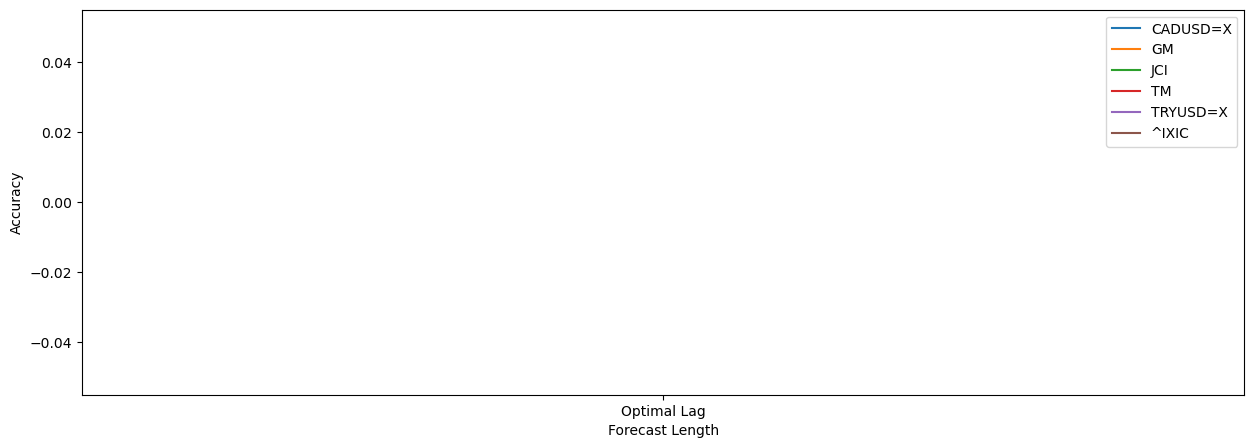

In [32]:
plt.figure(figsize=(15, 5))
for i in range(6):
    plt.plot(accuracy.iloc[i, 1:], label=accuracy.loc[i,'Ticker'])
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Forecast Length')
plt.show()

In [33]:
df

,Date,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,...,F_change_in_price,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower
0,2019-11-26 00:00:00+00:00,0.751665,0.751705,0.752842,0.750999,0.0,-0.000418,0.000000,0.000418,0.000289,...,0.010000,62.087549,73.913071,-26.086929,0.006892,0.002249,-0.331855,2.394865e+06,9.188927,8.586074
1,2019-11-27 00:00:00+00:00,0.753597,0.753636,0.754205,0.752502,0.0,0.001932,0.001932,0.000000,0.000427,...,0.090000,67.610216,89.583482,-10.416518,0.019164,0.005663,0.220269,2.768411e+06,9.183159,8.647842
2,2019-11-29 00:00:00+00:00,0.753125,0.753029,0.753211,0.751145,0.0,-0.000607,0.000000,0.000607,0.000427,...,-0.040000,62.910674,81.250149,-18.749851,0.025755,0.009711,0.221244,2.710846e+06,9.165730,8.712270
3,2019-12-02 00:00:00+00:00,0.752734,0.752791,0.753296,0.751569,0.0,-0.000238,0.000000,0.000238,0.000419,...,-0.050000,57.178300,70.833433,-29.166567,0.027163,0.013223,2.270145,2.505366e+06,9.172619,8.717381
4,2019-12-03 00:00:00+00:00,0.751552,0.751710,0.752899,0.750728,0.0,-0.001081,0.000000,0.001081,0.000419,...,-0.120000,45.657569,45.833433,-54.166567,0.019687,0.014522,1.137661,1.963927e+06,9.166840,8.712161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,2024-10-22 00:00:00+00:00,0.722883,0.722883,0.723877,0.722684,0.0,-0.001776,0.000000,0.001776,0.000308,...,0.230000,63.192190,91.764633,-8.235367,0.063288,0.007636,6.315788,6.779642e+07,11.195281,10.306719
1233,2024-10-23 00:00:00+00:00,0.723788,0.723788,0.723809,0.721433,0.0,0.000905,0.000905,0.000000,0.000245,...,-0.049999,59.825069,80.219848,-19.780152,0.071755,0.020460,4.635769,6.762839e+07,11.223237,10.297763
1234,2024-10-24 00:00:00+00:00,0.722716,0.722716,0.724008,0.721480,0.0,-0.001072,0.000000,0.001072,0.000245,...,0.179999,67.105734,98.850548,-1.149452,0.091931,0.034754,7.149667,6.835647e+07,11.282170,10.320830
1235,2024-10-25 00:00:00+00:00,0.721850,0.721850,0.722648,0.720170,0.0,-0.000866,0.000000,0.000866,0.000245,...,-0.170000,56.038726,72.631549,-27.368451,0.093129,0.046429,4.237286,6.776479e+07,11.312438,10.329562


## Timeseries forecast

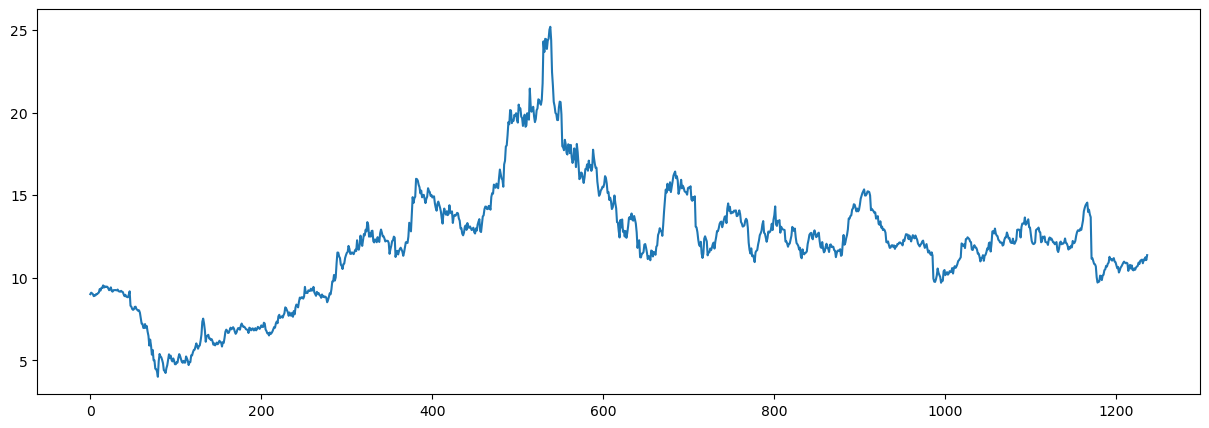

In [34]:
# Plot F time series
plt.figure(figsize=(15, 5))
plt.plot(df['F_Close'])
plt.show()

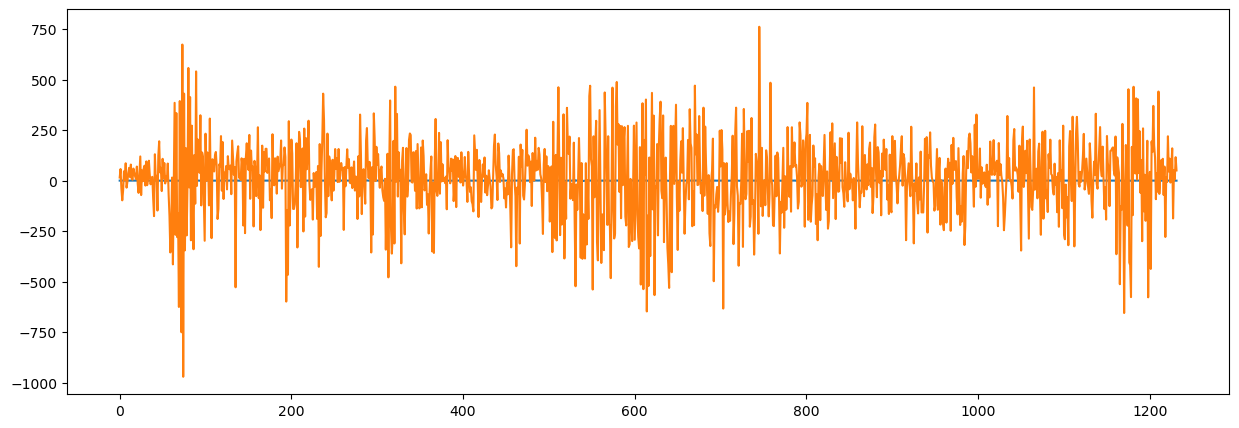

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(train)
plt.show()